<a href="https://colab.research.google.com/github/yamadashamoji/Colab/blob/main/%E7%AB%9C%E5%B7%BB%E3%81%AE%E8%BB%8C%E9%81%93%E3%83%A2%E3%83%87%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

簡単な竜巻モデルを作成し、その軌道を3Dプロットで表示します。主な特徴は以下の通りです：

`tornado_model` 関数: 竜巻の動きを定義します。水平方向の回転と垂直方向の上昇を組み合わせています。

パラメータ:

* a: 水平方向の回転の強さ
* b: 垂直方向の上昇の強さ
* c: 竜巻の半径に関するパラメータ

軌道計算: 簡単なオイラー法を使用して粒子の軌道を計算します。
可視化: matplotlib を使用して3D軌道をプロットします。

このモデルを実行すると、螺旋状に上昇する軌道が表示されます。これが竜巻の基本的な動きを表現しています。
モデルをさらに改良したい場合、以下のような拡張が可能です：

より複雑な風の場を導入する
複数の粒子をシミュレートして、竜巻の形状をより詳細に表現する
地形の影響や大気条件の変化を考慮する

このコードを実行して、結果を確認してみてください。何か質問や修正したい点があれば、お気軽にお聞きください。

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31452 (\N{CJK UNIFIED IDEOGRAPH-7ADC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24059 (\N{CJK UNIFIED IDEOGRAPH-5DFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36556 (\N{CJK UNIFIED IDEOGRAPH-8ECC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

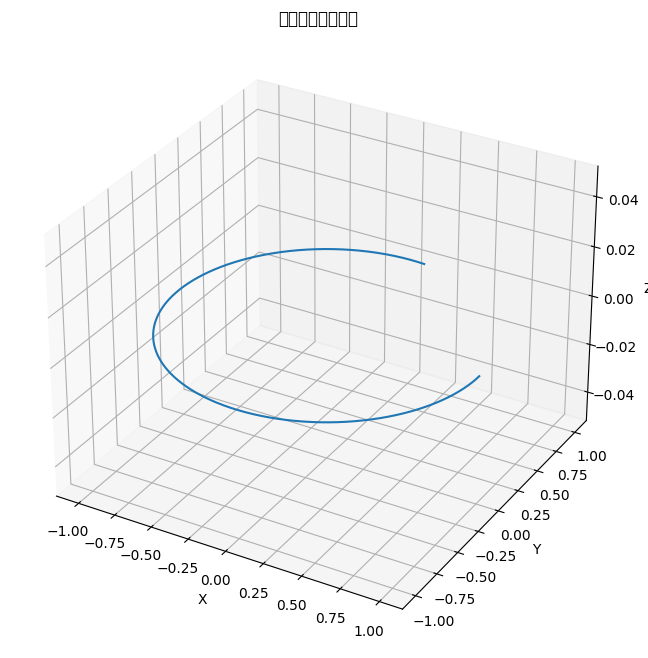

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def tornado_model(t, x, y, z):
    # パラメータ
    a = 1  # 水平方向の回転の強さ
    b = 0.1  # 垂直方向の上昇の強さ
    c = 0.1  # 竜巻の半径の逆数

    # 速度成分
    dx_dt = a * y
    dy_dt = -a * x
    dz_dt = b * z

    # 竜巻の形状を表現するための半径依存性
    r = np.sqrt(x**2 + y**2)
    factor = 1 - np.exp(-c * r**2)

    return factor * dx_dt, factor * dy_dt, dz_dt

# 時間と初期位置
t = np.linspace(0, 50, 1000)
x0, y0, z0 = 1, 0, 0

# 軌道の計算
dt = t[1] - t[0]
x, y, z = [x0], [y0], [z0]
for _ in range(1, len(t)):
    dx, dy, dz = tornado_model(t[_], x[-1], y[-1], z[-1])
    x.append(x[-1] + dx * dt)
    y.append(y[-1] + dy * dt)
    z.append(z[-1] + dz * dt)

# プロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('竜巻の軌道モデル')
plt.show()

以下の複雑な風の要素を追加しました：

1. 時間変化する風の成分：
   `time_varying_wind_x` と `time_varying_wind_y` を追加し、正弦波と余弦波を使用して時間とともに変化する風の効果を表現しています。

2. 高度に依存する風の成分：
   `altitude_wind` を追加し、高度が上がるにつれて風が強くなる効果を表現しています。

3. 乱流成分：
   `turbulence_x`, `turbulence_y`, `turbulence_z` を追加し、ランダムなノイズを使用して小さなスケールの乱流を表現しています。

4. 可視化の改善：
   散布図を使用し、時間に応じて色が変化するようにしました。これにより、粒子の軌道がどのように時間とともに変化するかを視覚的に理解しやすくなります。

この新しいモデルを実行すると、より不規則で複雑な軌道が得られます。これは実際の竜巻の複雑な動きをより良く近似しています。

モデルをさらに改良するためのアイデア：

1. 地形の影響を考慮する（例：地表面の摩擦や地形の起伏）
2. 大気の安定度や温度勾配の効果を組み込む
3. 複数の粒子をシミュレートして、竜巻の全体的な形状を表現する

このコードを実行して結果を確認し、さらなる改善点や質問があればお知らせください。

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35079 (\N{CJK UNIFIED IDEOGRAPH-8907}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38609 (\N{CJK UNIFIED IDEOGRAPH-96D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12394 (\N{HIRAGANA LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39080 (\N{CJK UNIFIED IDEOGRAPH-98A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22580 (\N{CJK UNIFIED IDEOGRAPH-5834}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

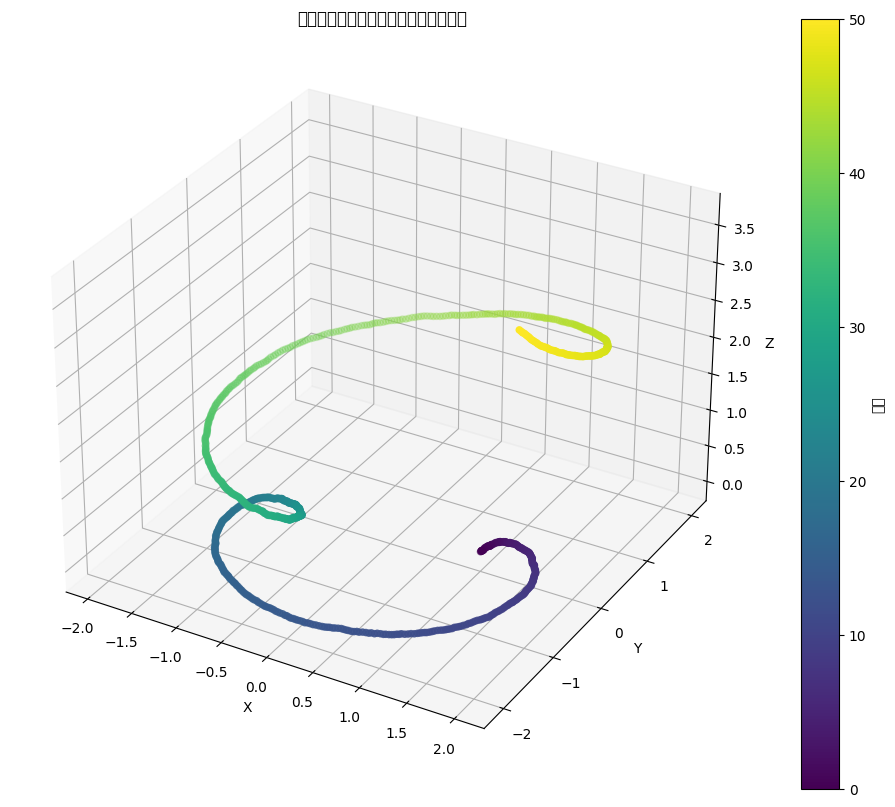

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def complex_wind_field(t, x, y, z):
    # 基本的な竜巻の動き
    a = 1  # 水平方向の回転の強さ
    b = 0.1  # 垂直方向の上昇の強さ
    c = 0.1  # 竜巻の半径の逆数

    dx_dt = a * y
    dy_dt = -a * x
    dz_dt = b * z

    # 竜巻の形状を表現するための半径依存性
    r = np.sqrt(x**2 + y**2)
    factor = 1 - np.exp(-c * r**2)

    # 時間変化する風の成分
    time_varying_wind_x = 0.2 * np.sin(0.1 * t)
    time_varying_wind_y = 0.2 * np.cos(0.1 * t)

    # 高度に依存する風の成分
    altitude_wind = 0.05 * z

    # 乱流成分（ランダムノイズ）
    turbulence_strength = 0.1
    turbulence_x = turbulence_strength * (2 * np.random.random() - 1)
    turbulence_y = turbulence_strength * (2 * np.random.random() - 1)
    turbulence_z = turbulence_strength * (2 * np.random.random() - 1)

    # すべての成分を組み合わせる
    final_dx_dt = factor * dx_dt + time_varying_wind_x + altitude_wind + turbulence_x
    final_dy_dt = factor * dy_dt + time_varying_wind_y + altitude_wind + turbulence_y
    final_dz_dt = dz_dt + turbulence_z

    return final_dx_dt, final_dy_dt, final_dz_dt

# 時間と初期位置
t = np.linspace(0, 50, 1000)
x0, y0, z0 = 1, 0, 0

# 軌道の計算
dt = t[1] - t[0]
x, y, z = [x0], [y0], [z0]
for i in range(1, len(t)):
    dx, dy, dz = complex_wind_field(t[i], x[-1], y[-1], z[-1])
    x.append(x[-1] + dx * dt)
    y.append(y[-1] + dy * dt)
    z.append(z[-1] + dz * dt)

# プロット
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=t, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('複雑な風の場を含む竜巻の軌道モデル')
plt.colorbar(scatter, label='時間')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31890 (\N{CJK UNIFIED IDEOGRAPH-7C92}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python

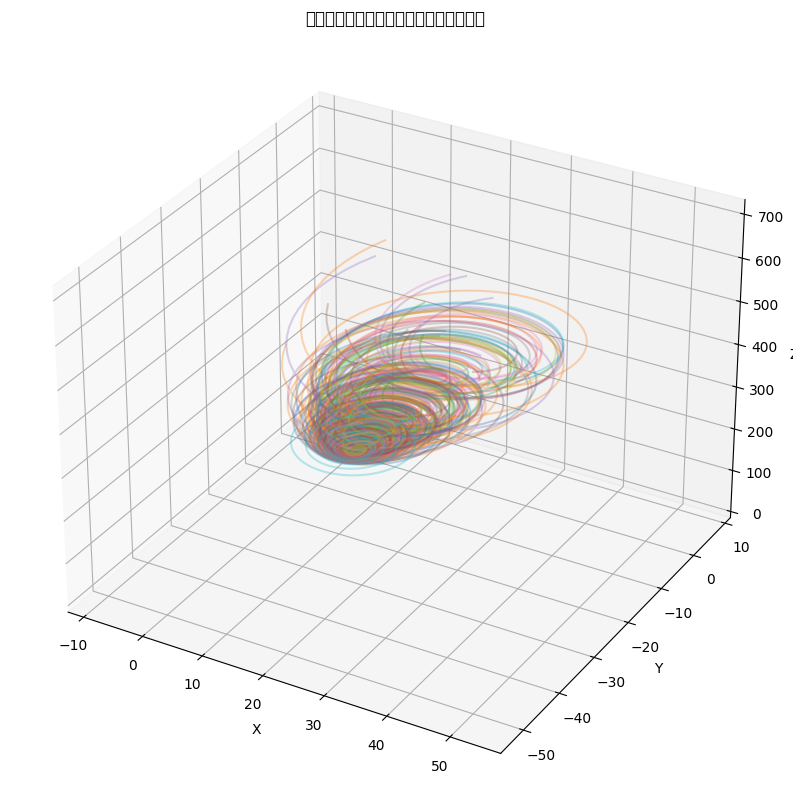

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def complex_wind_field(t, x, y, z):
    # 基本的な竜巻の動き
    a = 1  # 水平方向の回転の強さ
    b = 0.1  # 垂直方向の上昇の強さ
    c = 0.1  # 竜巻の半径の逆数

    dx_dt = a * y
    dy_dt = -a * x
    dz_dt = b * z

    # 竜巻の形状を表現するための半径依存性
    r = np.sqrt(x**2 + y**2)
    factor = 1 - np.exp(-c * r**2)

    # 時間変化する風の成分
    time_varying_wind_x = 0.2 * np.sin(0.1 * t)
    time_varying_wind_y = 0.2 * np.cos(0.1 * t)

    # 高度に依存する風の成分
    altitude_wind = 0.05 * z

    # 乱流成分（ランダムノイズ）
    turbulence_strength = 0.1
    turbulence_x = turbulence_strength * (2 * np.random.random() - 1)
    turbulence_y = turbulence_strength * (2 * np.random.random() - 1)
    turbulence_z = turbulence_strength * (2 * np.random.random() - 1)

    # すべての成分を組み合わせる
    final_dx_dt = factor * dx_dt + time_varying_wind_x + altitude_wind + turbulence_x
    final_dy_dt = factor * dy_dt + time_varying_wind_y + altitude_wind + turbulence_y
    final_dz_dt = dz_dt + turbulence_z

    return final_dx_dt, final_dy_dt, final_dz_dt

# シミュレーションパラメータ
num_particles = 100
num_steps = 500
dt = 0.1

# 粒子の初期位置
r = np.random.uniform(0, 2, num_particles)
theta = np.random.uniform(0, 2*np.pi, num_particles)
z = np.random.uniform(0, 5, num_particles)

x = r * np.cos(theta)
y = r * np.sin(theta)

# 軌道の計算
trajectories = np.zeros((num_particles, num_steps, 3))
trajectories[:, 0, 0] = x
trajectories[:, 0, 1] = y
trajectories[:, 0, 2] = z

for step in range(1, num_steps):
    t = step * dt
    for i in range(num_particles):
        dx, dy, dz = complex_wind_field(t, trajectories[i, step-1, 0], trajectories[i, step-1, 1], trajectories[i, step-1, 2])
        trajectories[i, step, 0] = trajectories[i, step-1, 0] + dx * dt
        trajectories[i, step, 1] = trajectories[i, step-1, 1] + dy * dt
        trajectories[i, step, 2] = trajectories[i, step-1, 2] + dz * dt

# プロット
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_particles):
    ax.plot(trajectories[i, :, 0], trajectories[i, :, 1], trajectories[i, :, 2], alpha=0.3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('複数粒子による竜巻のシミュレーション')

plt.show()

<ipython-input-6-9589c76433cd>:59: UserWarning: Glyph 31452 (\N{CJK UNIFIED IDEOGRAPH-7ADC}) missing from current font.
  anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)
<ipython-input-6-9589c76433cd>:59: UserWarning: Glyph 24059 (\N{CJK UNIFIED IDEOGRAPH-5DFB}) missing from current font.
  anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)
<ipython-input-6-9589c76433cd>:59: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)
<ipython-input-6-9589c76433cd>:59: UserWarning: Glyph 12511 (\N{KATAKANA LETTER MI}) missing from current font.
  anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)
<ipython-input-6-9589c76433cd>:59: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from current font.
  anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)
<ipython-input-6-9589c76433c

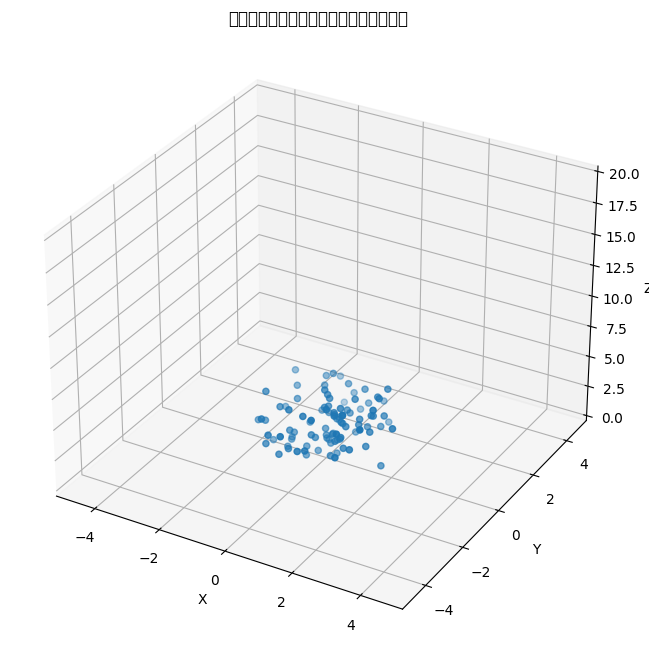

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

def complex_wind_field(t, x, y, z):
    a, b, c = 1, 0.1, 0.1
    dx_dt = a * y
    dy_dt = -a * x
    dz_dt = b * z
    r = np.sqrt(x**2 + y**2)
    factor = 1 - np.exp(-c * r**2)
    time_varying_wind_x = 0.2 * np.sin(0.1 * t)
    time_varying_wind_y = 0.2 * np.cos(0.1 * t)
    altitude_wind = 0.05 * z
    turbulence_strength = 0.1
    turbulence = turbulence_strength * (2 * np.random.random(3) - 1)
    return (factor * dx_dt + time_varying_wind_x + altitude_wind + turbulence[0],
            factor * dy_dt + time_varying_wind_y + altitude_wind + turbulence[1],
            dz_dt + turbulence[2])

# シミュレーションパラメータ
num_particles = 100
num_steps = 500
dt = 0.1

# 粒子の初期位置
r = np.random.uniform(0, 2, num_particles)
theta = np.random.uniform(0, 2*np.pi, num_particles)
z = np.random.uniform(0, 5, num_particles)
particles = np.array([r * np.cos(theta), r * np.sin(theta), z]).T

# アニメーションの設定
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(particles[:, 0], particles[:, 1], particles[:, 2])

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(0, 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('竜巻シミュレーションのアニメーション')

# アニメーションの更新関数
def update(frame):
    global particles
    t = frame * dt
    for i in range(num_particles):
        dx, dy, dz = complex_wind_field(t, particles[i, 0], particles[i, 1], particles[i, 2])
        particles[i, 0] += dx * dt
        particles[i, 1] += dy * dt
        particles[i, 2] += dz * dt
    scatter._offsets3d = (particles[:, 0], particles[:, 1], particles[:, 2])
    return scatter,

# アニメーションの作成
anim = FuncAnimation(fig, update, frames=num_steps, interval=50, blit=True)

plt.show()

# アニメーションを保存する場合（オプション）
# anim.save('tornado_animation.gif', writer='pillow', fps=30)